In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS
%matplotlib inline

INPUT_DIR = r"F:\2020 Morita\推進費(芦名S18-4-2)"

# matplotlibで日本語を使えるように
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Meiryo"]

In [1]:
import geopandas as gpd
from geopandas.datasets import get_path
world = gpd.read_file(get_path('naturalearth_lowres'))
cities = gpd.read_file(get_path('naturalearch_cities'))


OSError: could not find or load spatialindex_c-64.dll

# Read input files:

In [2]:
# filepaths
popBAU_fp = os.path.join(INPUT_DIR, r'spatial_data\\BAU.geojson')
popKA1_fp = os.path.join(INPUT_DIR, r'spatial_data\\可変ケース1.geojson')
popKA2_fp = os.path.join(INPUT_DIR, r'spatial_data\\可変ケース2.geojson')
popKO1_fp = os.path.join(INPUT_DIR, r'spatial_data\\固定ケース1.geojson')
popKO2_fp = os.path.join(INPUT_DIR, r'spatial_data\\固定ケース2.geojson')

railway_fp = os.path.join(INPUT_DIR,
                        r"spatial_data\\kkc_railway_merge.shp")
city_boundries_fp = os.path.join(INPUT_DIR, r"spatial_data\\北九州市境界.shp")
# Read in the data
pop_BAU = gpd.read_file(popBAU_fp)
popKA1 = gpd.read_file(popKA1_fp)
popKA2 = gpd.read_file(popKA2_fp)
popKO1 = gpd.read_file(popKO1_fp)
popKO2 = gpd.read_file(popKO2_fp)

city_boundries= gpd.read_file(city_boundries_fp)
# railway = gpd.read_file(railway_fp)


In [3]:
# View the columns of the data
pop_BAU.columns

Index(['FID_1', 'CODE', 'mesh_id', 'MeshCode2', 'pop_total_2015',
       'pop_old_2015', 'pop_total_2020', 'pop_old_2020', 'pop_total_2025',
       'pop_old_2025', 'pop_total_2030', 'pop_old_2030', 'pop_total_2035',
       'pop_old_2035', 'pop_total_2040', 'pop_old_2040', 'pop_total_2045',
       'pop_old_2045', 'pop_total_2050', 'pop_old_2050', 'geometry'],
      dtype='object')

In [6]:
# 統計量の確認
pop_BAU.describe()

,FID_1,CODE,mesh_id,MeshCode2,pop_total_2015,pop_old_2015,pop_total_2020,pop_old_2020,pop_total_2025,pop_old_2025,pop_total_2030,pop_old_2030,pop_total_2035,pop_old_2035,pop_total_2040,pop_old_2040,pop_total_2045,pop_old_2045,pop_total_2050,pop_old_2050
count,567.000000,5.670000e+02,5.670000e+02,4.190000e+02,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,4405.654321,5.032074e+07,5.032074e+07,5.030668e+07,2419.938049,712.510348,2337.222309,715.141480,2254.506568,717.772613,2171.790828,720.403746,2089.075088,723.034878,2006.359347,725.666011,1923.643607,728.297144,1840.927866,730.928276
std,287.500371,1.173329e+05,1.173329e+05,1.667523e+03,2942.314855,852.900685,2859.490562,856.023780,2778.392382,862.662138,2699.175905,872.735545,2622.011689,886.126863,2547.086260,902.688439,2474.602982,922.249498,2404.782696,944.623720
min,3685.000000,5.030466e+07,5.030466e+07,5.030467e+07,0.999980,0.000000,0.888218,0.000000,0.776457,0.000000,0.664695,0.000000,0.552933,0.000000,0.441172,0.000000,0.329410,0.000000,-12.047225,-12.047225
25%,4162.500000,5.030570e+07,5.030570e+07,5.030575e+07,102.999675,45.500555,99.585217,43.327369,92.768428,40.682760,84.094887,38.864215,76.044488,34.684355,66.130437,30.734122,57.572465,26.302475,48.577046,22.766198
50%,4466.000000,5.030662e+07,5.030662e+07,5.030663e+07,1041.979840,331.953580,1009.364842,331.306783,960.353490,330.934563,908.210200,312.205575,856.947213,305.382233,783.380455,299.040238,705.402060,295.213710,644.152502,283.723840
75%,4607.500000,5.030676e+07,5.030676e+07,5.030675e+07,4129.010940,1184.513830,3990.634946,1206.908123,3886.758952,1194.793263,3726.724300,1194.652485,3586.012540,1242.862210,3432.311096,1262.842963,3203.130805,1246.660110,3112.144255,1215.626674
max,5053.000000,5.130060e+07,5.130060e+07,5.031705e+07,13357.011790,4099.347860,12920.409970,4155.786648,12681.048500,4212.225437,12502.107705,4268.664225,12323.166910,4325.103013,12144.226115,4381.541802,11965.285320,4544.037630,11786.344525,4785.145253


In [5]:
# View the first five rows of the data
pop_BAU.head()

,FID_1,CODE,mesh_id,MeshCode2,pop_total_2015,pop_old_2015,pop_total_2020,pop_old_2020,pop_total_2025,pop_old_2025,...,pop_old_2030,pop_total_2035,pop_old_2035,pop_total_2040,pop_old_2040,pop_total_2045,pop_old_2045,pop_total_2050,pop_old_2050,geometry
0,3685,50304665,50304665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((130.81250 33.71667, 130.81250 ..."
1,3686,50304666,50304666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((130.82500 33.71667, 130.82500 ..."
2,3687,50304667,50304667,50304667.0,36.99934,11.99991,33.585493,11.299288,30.171647,10.598667,...,9.898045,23.343953,9.197423,19.930107,8.496802,16.51626,7.79618,13.102413,7.095558,"MULTIPOLYGON (((130.83750 33.71667, 130.83750 ..."
3,3694,50304674,50304674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((130.80000 33.72500, 130.80000 ..."
4,3695,50304675,50304675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((130.81250 33.72500, 130.81250 ..."


# Chenk the coordinate reference systems（crs) of the input files.

In [19]:
# Check the crs of each layer
print(pop_BAU.crs)
print(city_boundries.crs)

epsg:4326
epsg:6668


In [21]:
city_boundries.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00050 33.86785, 131.00050 33.867..."
1,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00320 33.86900, 131.00100 33.867..."
2,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00833 33.87195, 131.00485 33.869..."
3,福岡県,None,北九州市,門司区,40101,"POLYGON ((130.98734 33.87361, 130.98728 33.873..."
4,福岡県,None,北九州市,門司区,40101,"POLYGON ((130.99566 33.87819, 130.99562 33.878..."


In [22]:
# convert the CRS to ESPG 4326
city_boundries.to_crs(epsg=4326, inplace=True)
print(city_boundries.crs)
city_boundries.head()

epsg:4326


,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00050 33.86785, 131.00050 33.867..."
1,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00320 33.86900, 131.00100 33.867..."
2,福岡県,None,北九州市,門司区,40101,"POLYGON ((131.00833 33.87195, 131.00485 33.869..."
3,福岡県,None,北九州市,門司区,40101,"POLYGON ((130.98734 33.87361, 130.98728 33.873..."
4,福岡県,None,北九州市,門司区,40101,"POLYGON ((130.99566 33.87819, 130.99562 33.878..."


# Visualize

In [58]:
from matplotlib_scalebar.scalebar import ScaleBar

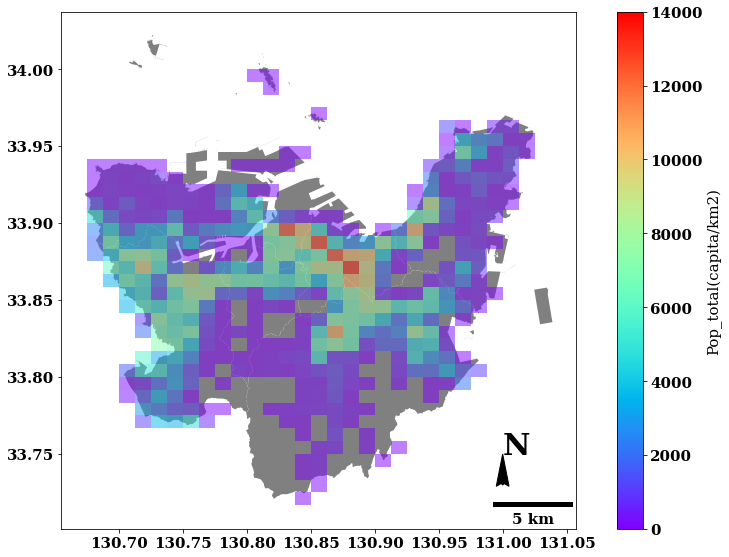

In [59]:
# Create a map

with plt.rc_context(rc={
        'font.family': 'serif',
        'font.weight': 'bold',
        'font.size': 15
}):
    # control figure size in here
    fig, axes = plt.subplots(figsize=(12, 8))

    city_boundries.plot(ax=axes, color='grey', linewidth=1.5)
    # Visualize the pop total withoud scheme setting
    pop_BAU.plot(
        ax=axes,
        column='pop_total_2015',
        linewidth=0.03,
        cmap='rainbow',
        #              scheme='Quantiles',
        #              k=9,
        alpha=0.5,
        legend=True,
        vmin=0,
        vmax=14000,
        legend_kwds={
            'label': 'Pop_total(capita/km2)',
            'orientation': "vertical"
        })

    # add Norse arrow and scaleBar
    axes.text(x=131.0, y=33.75, s='N', fontsize=30)
    axes.arrow(x=131.0,
               y=33.73,
               dx=0,
               dy=0.02,
               length_includes_head=True,
               head_width=0.01,
               head_length=0.021,
               overhang=.1,
               color='black')
    # add scaleBar
    ## 0.05/4ピクセルが1kmくらい=>1pixel=1*4/0.05=80km
    scalebar = ScaleBar(80, location='lower right', units='km')
    axes.add_artist(a=scalebar)

    # remove the empty white-space around the axes
    plt.tight_layout()

複数年代(8年代をまとめて表示する)

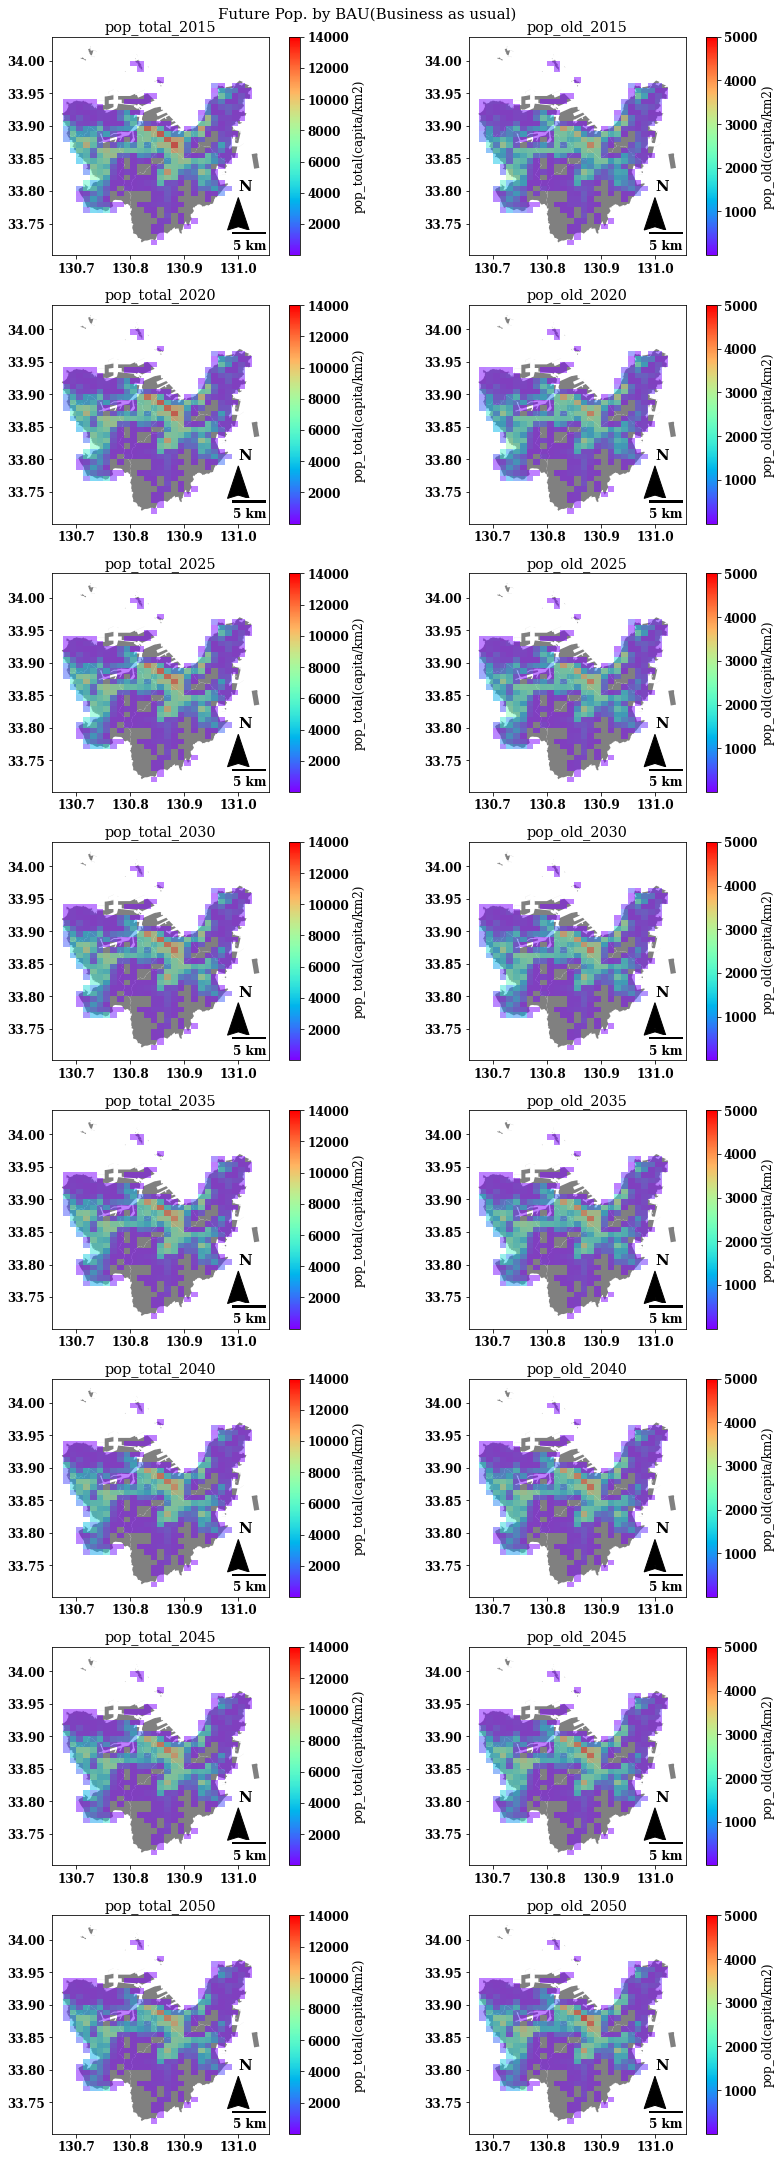

In [63]:
time_list = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

with plt.rc_context(rc={
        'font.family': 'serif',
        'font.weight': 'bold',
        'font.size': 12
}):
    fig, axes = plt.subplots(figsize=(12, 30), nrows=8, ncols=2)

    for i_row, time in enumerate(time_list):

        # time年におけるpop_totalとpop_oldを描画
        for i_col, column in enumerate(['total', 'old']):
            ax = axes[i_row, i_col]
            ax.set_title(label=f'pop_{column}_{time}')
            city_boundries.plot(ax=ax, color='grey', linewidth=1.5)
            # カラーバーの最大値の場合分け
            if column=='total': max_value = 14000
            elif column=='old': max_value = 5000
            
            pop_BAU.plot(
                ax=ax,
                column=f'pop_{column}_{time}',
                linewidth=0.03,
                cmap='rainbow',
                #              scheme='Quantiles',
                #              k=9,
                alpha=0.5,
                legend=True,
                vmin=1,
                vmax=max_value,
                legend_kwds={
                    'label': f'pop_{column}(capita/km2)',
                    'orientation': "vertical"
                })
            # add scalebar
            scalebar = ScaleBar(80, location='lower right', units='km')
            ax.add_artist(a=scalebar)
            # add Norse arrow
            ax.text(x=131.0, y=33.8, s='N', fontsize=15)
            ax.arrow(x=131.0,y=33.75,dx=0,dy=0.04,length_includes_head=True,
                       head_width=0.04,head_length=0.05,overhang=.1,color='black')
            
    # remove the empty white-space around the axes
    plt.tight_layout()
    # figure全体のタイトル
    fig.suptitle(t=f'Future Pop. by BAU(Business as usual)', fontsize=15, 
                horizontalalignment='center', y=1)
    INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ\for animation"
    fig.savefig(fname=os.path.join(INPUT_DIR, f'BAU.png'))

suptitleとtitleのオプション  
https://python.atelierkobato.com/title/

固定ケース1のシナリオ

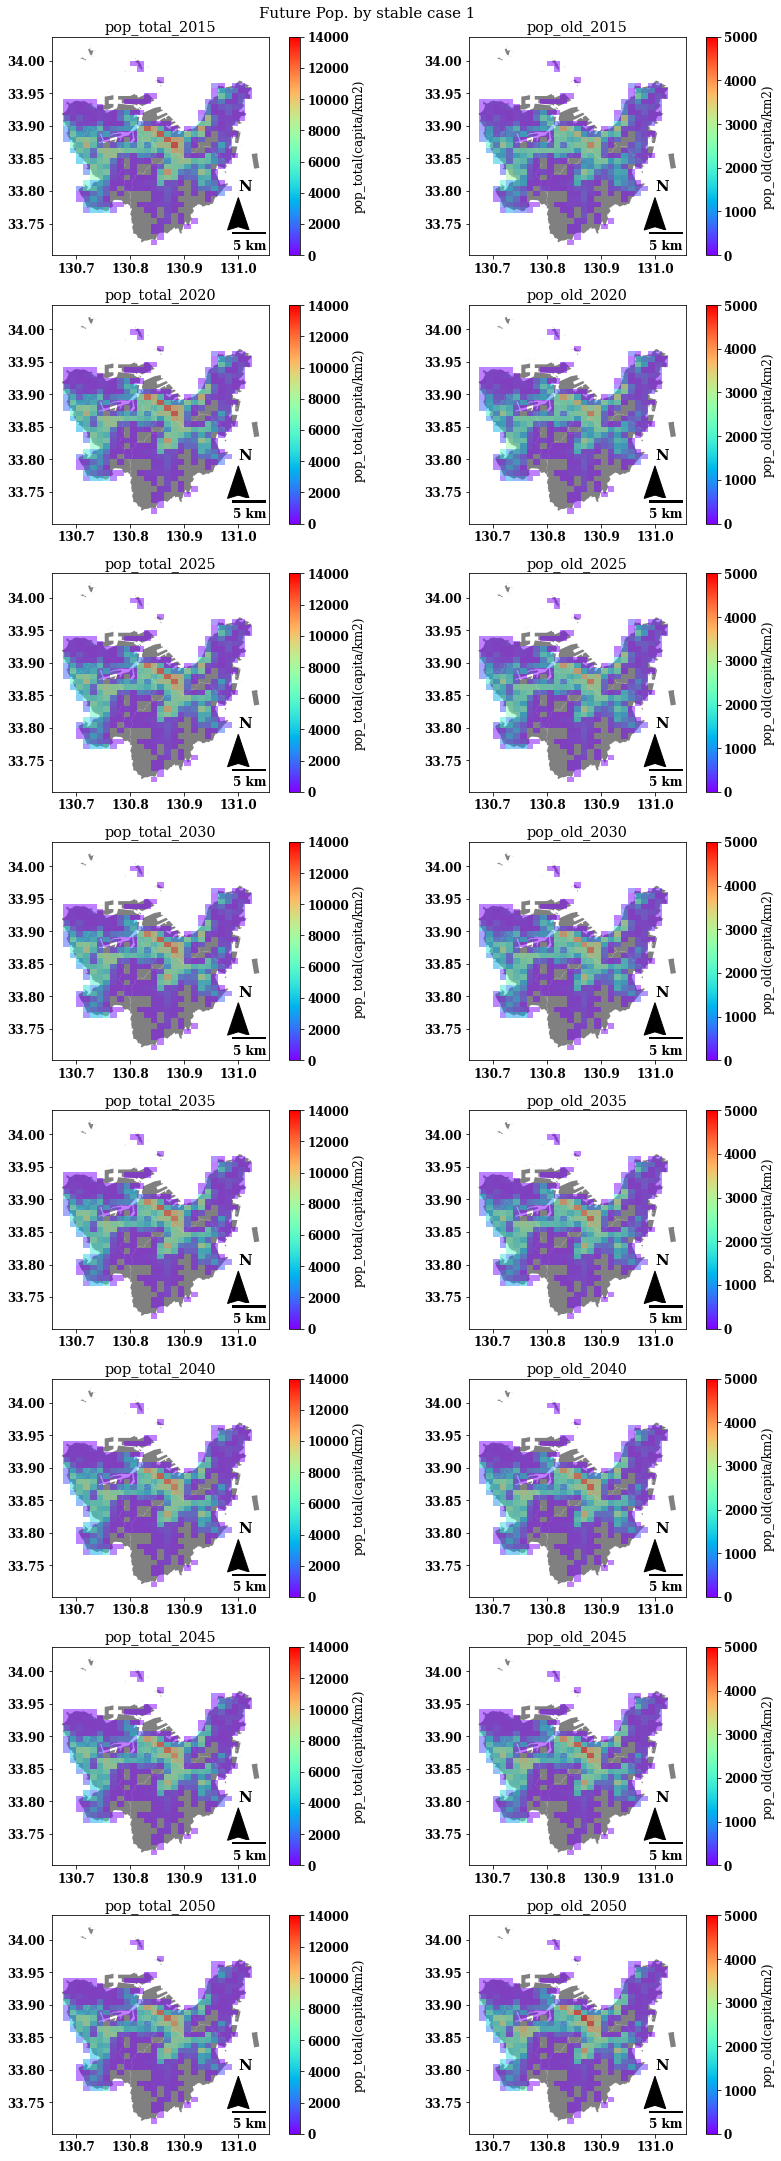

In [64]:
time_list = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

with plt.rc_context(rc={
        'font.family': 'serif',
        'font.weight': 'bold',
        'font.size': 12
}):
    fig, axes = plt.subplots(figsize=(12, 30), nrows=8, ncols=2)

    for i_row, time in enumerate(time_list):

        # time年におけるpop_totalとpop_oldを描画
        for i_col, column in enumerate(['total', 'old']):
            ax = axes[i_row, i_col]
            ax.set_title(label=f'pop_{column}_{time}')
            city_boundries.plot(ax=ax, color='grey', linewidth=1.5)
            # カラーバーの最大値の場合分け
            if column=='total': max_value = 14000
            elif column=='old': max_value = 5000
            
            popKO1.plot(
                ax=ax,
                column=f'pop_{column}_{time}',
                linewidth=0.03,
                cmap='rainbow',
                #              scheme='Quantiles',
                #              k=9,
                alpha=0.5,
                legend=True,
                vmin=0,
                vmax=max_value,
                legend_kwds={
                    'label': f'pop_{column}(capita/km2)',
                    'orientation': "vertical"
                })
            # add scalebar
            scalebar = ScaleBar(80, location='lower right', units='km')
            ax.add_artist(a=scalebar)
            # add Norse arrow
            ax.text(x=131.0, y=33.8, s='N', fontsize=15)
            ax.arrow(x=131.0,y=33.75,dx=0,dy=0.04,length_includes_head=True,
                       head_width=0.04,head_length=0.05,overhang=.1,color='black')
            
    # remove the empty white-space around the axes
    plt.tight_layout()
    # figure全体のタイトル
    fig.suptitle(t=f'Future Pop. by stable case 1', fontsize=15, 
                horizontalalignment='center', y=1)
    INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ\for animation"
    fig.savefig(fname=os.path.join(INPUT_DIR, f'KO1.png'))

可変ケース1のシナリオ

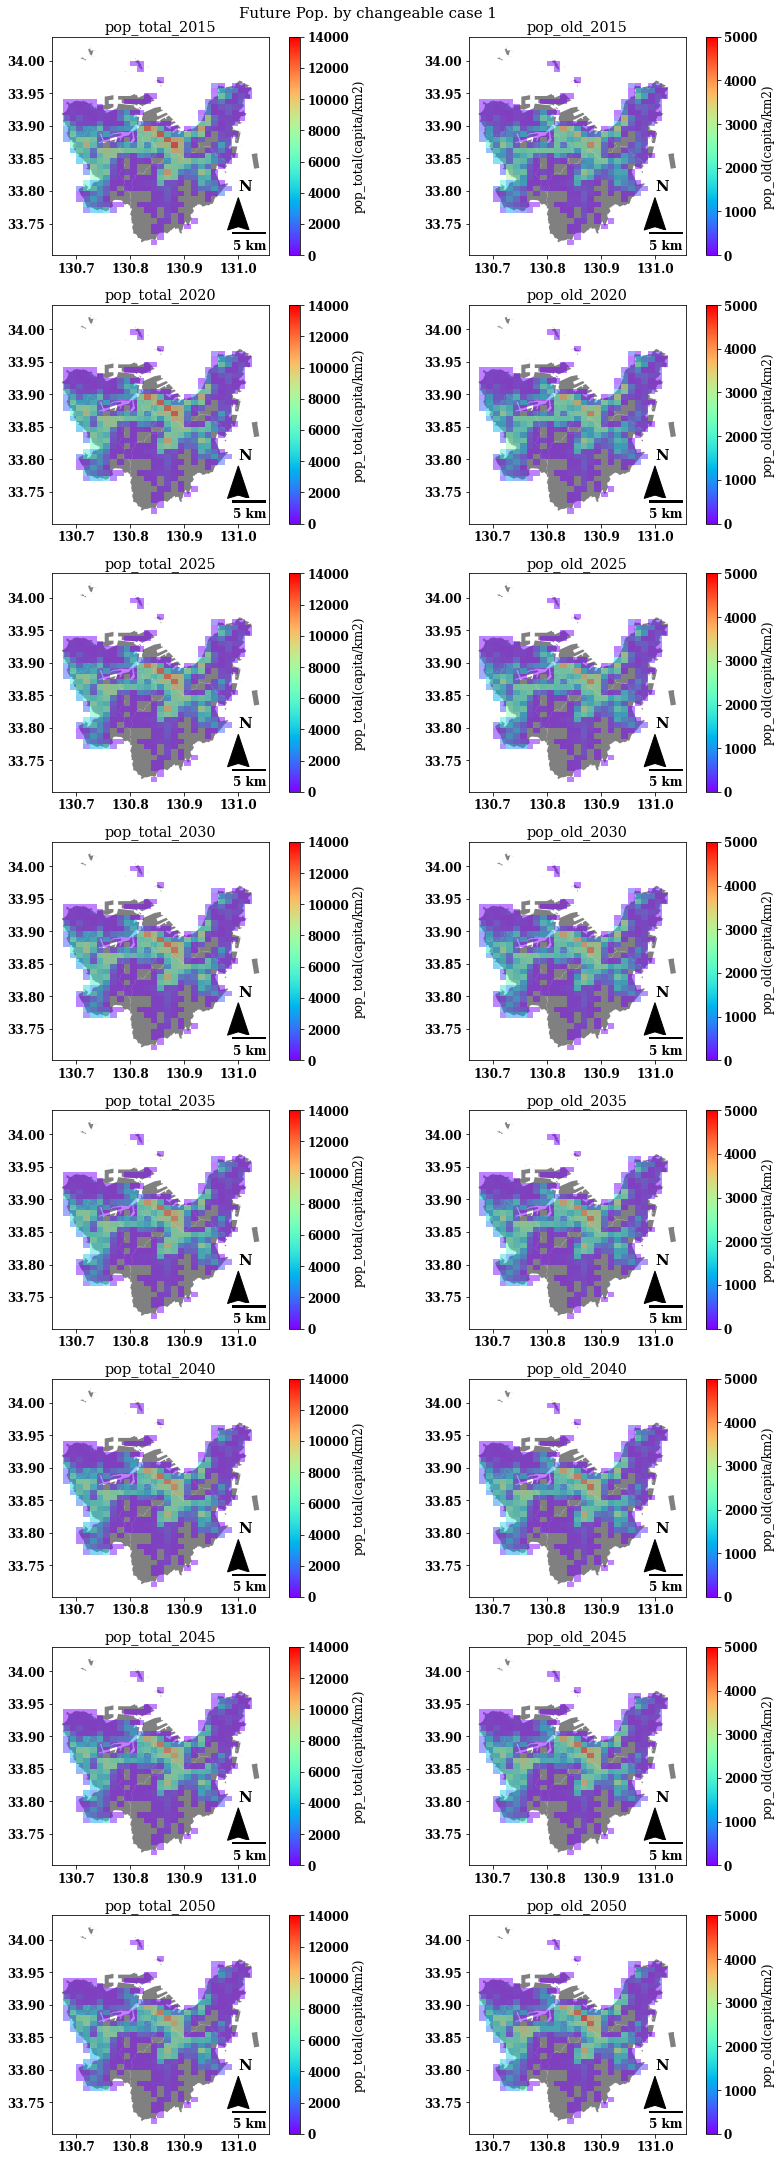

In [65]:
time_list = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

with plt.rc_context(rc={
        'font.family': 'serif',
        'font.weight': 'bold',
        'font.size': 12
}):
    fig, axes = plt.subplots(figsize=(12, 30), nrows=8, ncols=2)

    for i_row, time in enumerate(time_list):

        # time年におけるpop_totalとpop_oldを描画
        for i_col, column in enumerate(['total', 'old']):
            ax = axes[i_row, i_col]
            ax.set_title(label=f'pop_{column}_{time}')
            city_boundries.plot(ax=ax, color='grey', linewidth=1.5)
            # カラーバーの最大値の場合分け
            if column=='total': max_value = 14000
            elif column=='old': max_value = 5000
            
            popKA1.plot(
                ax=ax,
                column=f'pop_{column}_{time}',
                linewidth=0.03,
                cmap='rainbow',
                #              scheme='Quantiles',
                #              k=9,
                alpha=0.5,
                legend=True,
                vmin=0,
                vmax=max_value,
                legend_kwds={
                    'label': f'pop_{column}(capita/km2)',
                    'orientation': "vertical"
                })
            # add scalebar
            scalebar = ScaleBar(80, location='lower right', units='km')
            ax.add_artist(a=scalebar)
            # add Norse arrow
            ax.text(x=131.0, y=33.8, s='N', fontsize=15)
            ax.arrow(x=131.0,y=33.75,dx=0,dy=0.04,length_includes_head=True,
                       head_width=0.04,head_length=0.05,overhang=.1,color='black')
            
    # remove the empty white-space around the axes
    plt.tight_layout()
    # figure全体のタイトル
    fig.suptitle(t=f'Future Pop. by changeable case 1', fontsize=15, 
                horizontalalignment='center', y=1)
    INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ\for animation"
    fig.savefig(fname=os.path.join(INPUT_DIR, f'KA1.png'))

# gif画像を作る

In [ ]:
from PIL import Image
import os
import glob


# GIFアニメーションを作成する関数
def create_gif(in_dir, out_filename):
    # ファイルパスをソートしてリストに格納
    path_list = sorted(glob.glob(os.path.join(*[in_dir, '*'])))
    imgs = []

    # ファイルのFullパスからファイル名と拡張子を抽出
    for i in range(len(path_list)):
        # 画像ファイルを一つずつ開く
        img = Image.open(path_list[i])
        # 画像をappendでリストに格納
        imgs.append(img)

    # appendした画像のリストをGIFにする。
    ## dirationで持続時間。loopでループ数を指定可能
    imgs[0].save(out_filename,
                 save_all=True,
                 append_images=imgs[1:],
                 optimize=False,
                 duration=1000,
                 loop=0)

In [72]:
# 実行
INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ\for_animation\png_for_animation"
OUTPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ\for_animation\animation_gif"
create_gif(in_dir=INPUT_DIR,
           out_filename=os.path.join(OUTPUT_DIR, 'animation.gif'))

# Plot with Animation

## practice

In [31]:
from matplotlib import animation
import pandas as pd

In [33]:
INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ"
df = pd.read_csv(os.path.join(INPUT_DIR, '23population.csv'))
geodf = gpd.read_file(os.path.join(INPUT_DIR,'tokyo23.json'))
years = np.sort(np.unique(df.year.values))

In [37]:
display(geodf.head())
display(df.head())
print(years)

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,,,台東区,13106,"MULTIPOLYGON (((139.76667 35.71330, 139.76609 ..."
1,東京都,,,杉並区,13115,"MULTIPOLYGON (((139.64081 35.66667, 139.64076 ..."
2,東京都,,,文京区,13105,"MULTIPOLYGON (((139.71782 35.71605, 139.71783 ..."
3,東京都,,,新宿区,13104,"MULTIPOLYGON (((139.71397 35.67918, 139.71421 ..."
4,東京都,,,世田谷区,13112,"MULTIPOLYGON (((139.62407 35.61081, 139.62405 ..."


,year,city,population
0,1947,13112,356170.0
1,1947,13111,313746.0
2,1947,13115,284493.0
3,1947,13121,233217.0
4,1947,13109,219500.0


[1947 1950 1955 1960 1965 1970 1975 1980 1985 1990 1995 2000 2005 2010
 2015]


C:\Users\tanikawa\anaconda3\envs\stan\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: plot_polygon_collection is intended for internal use only, and will be deprecated.
  import sys


AttributeError: 'numpy.ndarray' object has no attribute 'str'

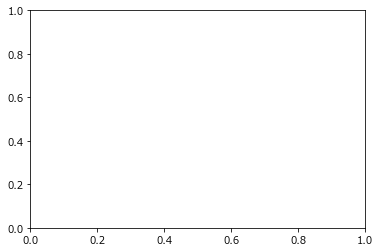

In [40]:
fig, ax = plt.subplots()
year = 1950
geos = geodf['geometry'].values
sum_ = np.sum(df[(df.year == year)].sort_values(by='city').population)
population_rates = df[(df.year
                       == year)].sort_values(by='city').population / sum_
artist = gpd.plotting.plot_polygon_collection(ax, geos, population_rates)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002126FC3D268> (for post_execute):


C:\Users\tanikawa\anaconda3\envs\stan\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\tanikawa\anaconda3\envs\stan\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: plot_polygon_collection is intended for internal use only, and will be deprecated.
  # This is added back by InteractiveShellApp.init_path()


AttributeError: 'numpy.ndarray' object has no attribute 'str'

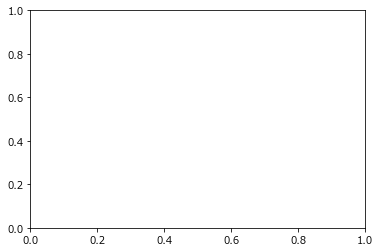

In [35]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ims = []


def update_fig(year):
    if len(ims) > 0:
        ims[0].remove()
        del ims[0]
    geos = geodf['geometry'].values
    sum_ = np.sum(df[(df.year == year)].sort_values(by='city').population)
    population_rates = df[(df.year
                           == year)].sort_values(by='city').population / sum_
    artist = gpd.plotting.plot_polygon_collection(ax,
                                                  geos,
                                                  population_rates,
                                                  True,
                                                  cmap="Reds")
    ims.append(artist)
    ax.set_title('year = ' + str(year))
    return ims


anim = FuncAnimation(fig,
                     update_fig,
                     interval=1000,
                     repeat_delay=3000,
                     frames=years)
fig.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


<class 'matplotlib.axes._subplots.AxesSubplot'> 

[[<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>], [<AxesSubplot:title={'center':'pop_kitakyusyu_7'}>]]


ValueError: unknown file extension: .mp4

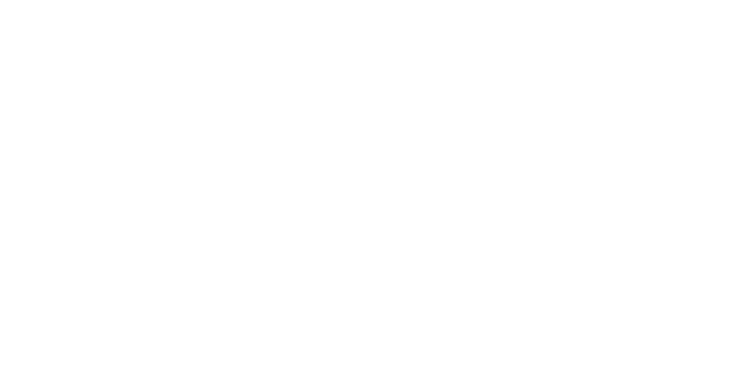

In [56]:
time_list = [2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ims =[]
for i_row, time in enumerate(time_list):
    column = 'kitakyusyu'
    im1 = city_boundries.plot(ax=axes, color='grey', linewidth=1.5)
    axes.set_title(label=f'pop_{column}_{i_row}')
    ims.append([im1])
    
print(type(im1), '\n')
print(ims)

ani = animation.ArtistAnimation(fig=fig, artists=ims, interval=1000)
# #imagemagickを使って，gif画像を保存
INPUT_DIR = r"F:\2020 Morita\2020.10~\将来予測結果\空間分布shp_100mメッシュ"
ani.save(os.path.join(INPUT_DIR, r'test3.mp4'), writer="ffmpeg", fps=4)

<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>


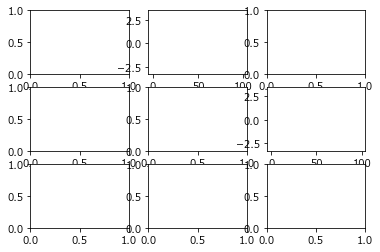

In [46]:
fig, axes = plt.subplots(3,3)
ims = []

for i in range(10):
    rand_1 = np.random.randn(100) # 100個の乱数を生成
    rand_2 = np.random.randn(100) # 100個の乱数を生成
    #im1の後ろに「,」を付けること
    im1, = axes[0,1].plot(rand_1, color='red')
    #im2の後ろに「,」を付けること
    im2, = axes[1,2].plot(rand_2, color='blue')
    print(type(im1))
    #[im1,im2] というリストをimsにappendする事．
    ims.append([im1,im2])
ani = animation.ArtistAnimation(fig=fig, artists=ims, interval=1000)

# Once the data are in the same projection, we can plot them on a map.

task
- Make a visualization using the plot() method in Geopandas.
- plot first the grid(=mesh data) using "quantiles" classification scheme=色付け方法の種類をscheme引数で指定
- then add roads in the same plot

plotting options for the polygon:
- Define the classification scheme using the scheme parameter
- Change the colormap using the cmap parameter. See [colormap options from matplotlib documentation]. (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#choosing-colormaps-in-matplotlib)
- You can add a little bit of transparency for the grid using the alpha parameter (ranges from 0 to 1 where 0 is fully transparent and 1 has no transparency)

Plotting options for the lines:
- adjust color using color parameter. See color options from matplotlib pyplot documentation.
- change linewidth if needed

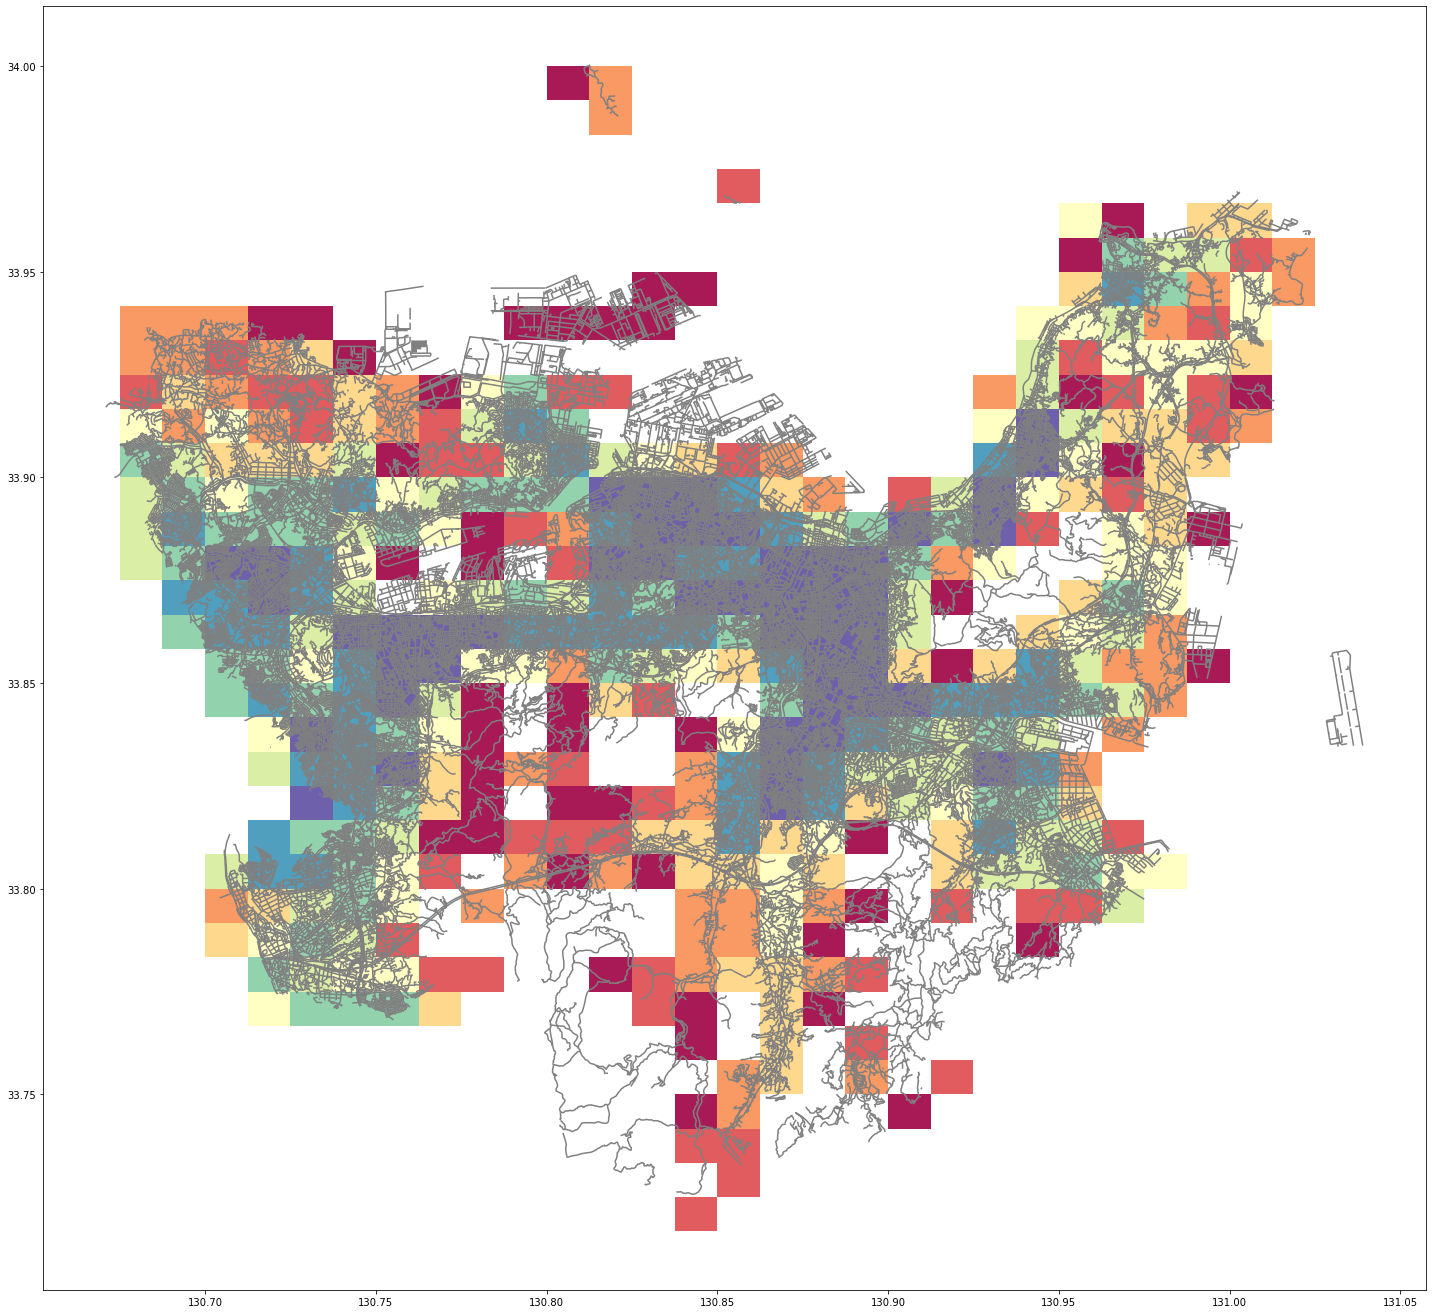

In [8]:
# Visualize the pop total into 9 classes using ”Quantiles” classification scheme
my_map = pop_BAU.plot(
    column='pop_total_2015',
    linewidth=0.03,
    cmap='Spectral',
    scheme='Quantiles', 
    k=9, alpha=0.9, figsize=(20,20)
)

# add roads on top of the grid(mesh)
roads.plot(ax=my_map, color='grey', linewidth=1.5)

# remove the empty white-space around the axes
plt.tight_layout()

For better control of the figure and axes, use the plt.subplots function before plotting the layers.

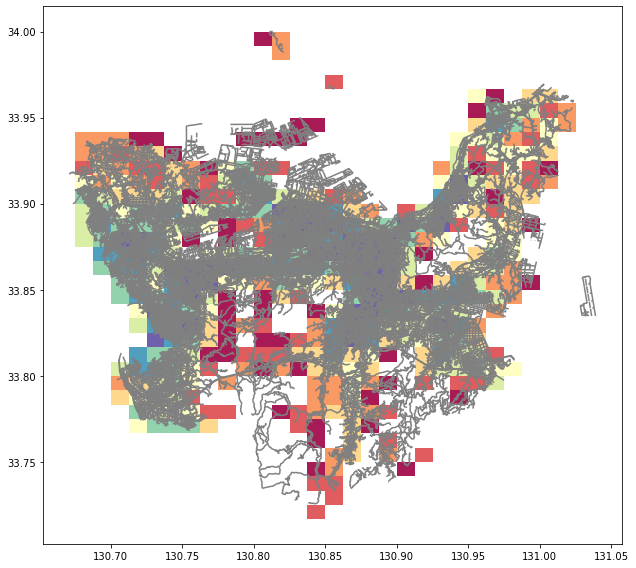

In [18]:
# control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Visualize the pop total into 9 classes using ”Quantiles” classification scheme
pop_BAU.plot(ax=ax,
             column='pop_total_2015',
             linewidth=0.03,
             cmap='Spectral',
             scheme='Quantiles',
             k=9,
             alpha=0.9)

# add roads on top of the grid(mesh)
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color='grey', linewidth=1.5)

# remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = os.path.join(INPUT_DIR, "static_map.png")
plt.savefig(outfp, dpi=300)

**Adding basemap from external source**  
- It is often useful to add a basemap to your visualization that shows e.g. streets and their names and other useful information directly underneath your visualization. 
- This can be done easily by using ready-made background map tiles that are provided by different providers such as OpenStreetMap or Stamen Design. 
- A Python library called **contextily** is a handy package that can be used to fetch geospatial raster files and add them to your maps. 
- Map tiles are typically distributed in Web Mercator projection (EPSG:3857), hence it is often necessary to reproject all the spatial data into Web Mercator before visualizing the data.

In this tutorial, we will see how to add a basemap underneath our previous visualization.

reproject the layer to ESPG 3857 projection (Web Mercator)

In [23]:
# Check the input crs:
print(pop2015.crs)
pop2015.head(2)

epsg:4612


,FID_1,CODE,mesh_id,MeshCode2,M00-04_15,M05-09_15,M10-14_15,M15-19_15,M20-24_15,M25-29_15,...,F50-54_15,F55-59_15,F60-64_15,F65-69_15,F70-74_15,F75-79_15,F80-84_15,F85over_15,2015_Total,geometry
0,3685,50304665,50304665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((130.81250 33.71667, 130.81250 33.725..."
1,3686,50304666,50304666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((130.82500 33.71667, 130.82500 33.725..."


In [24]:
# Reproject to EPSG 3857
data = pop2015.to_crs(epsg=3857)
print(data.crs)
data.head(2)

epsg:3857


,FID_1,CODE,mesh_id,MeshCode2,M00-04_15,M05-09_15,M10-14_15,M15-19_15,M20-24_15,M25-29_15,...,F50-54_15,F55-59_15,F60-64_15,F65-69_15,F70-74_15,F75-79_15,F80-84_15,F85over_15,2015_Total,geometry
0,3685,50304665,50304665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((14561980.889 3990820.481, 14561980.8..."
1,3686,50304666,50304666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((14563372.383 3990820.481, 14563372.3..."


Now as we can see, the data has been projected to epsg:3857. Also the coordinate values in the **geometry column** have changed.

Next, we can plot our data using Geopandas and add a basemap for our plot by using a function called .add_basemap() from contextily:

In [25]:
import contextily as ctx

C:\Users\tanikawa\anaconda3\envs\stan\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  from ipykernel import kernelapp as app


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000241D9745A40>

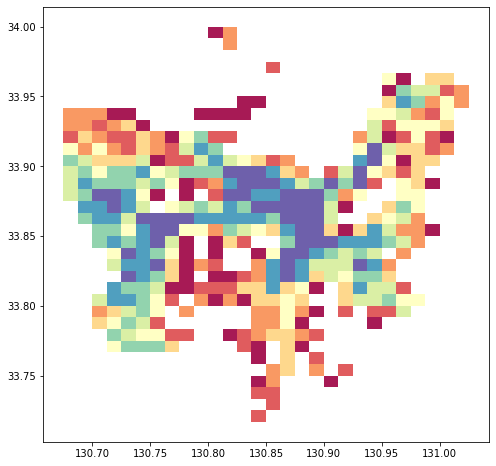

In [36]:
# control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Visualize the pop total into 9 classes using ”Quantiles” classification scheme
pop2015.plot(ax=ax,
             column='2015_Total',
             linewidth=0.03,
             cmap='Spectral',
             scheme='Quantiles',
             k=9,
             alpha=0.9,
             figsize=(20, 20))

# add basemap
ctx.add_basemap(ax, url=ctx.tile_providers.T_WATERCOLOR)

# Interactive maps

In [37]:
import mplleaflet

In [38]:
# control figure size in here
fig, ax = plt.subplots(figsize=(12, 8))

# Visualize the pop total into 9 classes using ”Quantiles” classification scheme
pop2015.plot(ax=ax,
             column='2015_Total',
             linewidth=0.03,
             cmap='Spectral',
             scheme='Quantiles',
             k=9,
             alpha=0.9,
             figsize=(20, 20))

mplleaflet.show()

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'